<a href="https://colab.research.google.com/github/Karanpahwaa/Customer-Churn-Prediction-ML/blob/main/customer_churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
df = pd.read_excel(r'/content/customer_churn_large_dataset.xlsx')
df.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0


In [4]:
df.sample(8)

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
1178,1179,Customer_1179,30,Female,Chicago,10,41.82,365,1
90101,90102,Customer_90102,33,Female,New York,22,61.92,291,1
16662,16663,Customer_16663,41,Female,Chicago,12,57.51,168,0
66282,66283,Customer_66283,68,Female,Los Angeles,2,85.82,363,1
38752,38753,Customer_38753,53,Male,New York,14,96.05,189,0
88220,88221,Customer_88221,41,Male,Los Angeles,14,63.17,195,1
36387,36388,Customer_36388,47,Male,Houston,5,73.93,387,0
34540,34541,Customer_34541,49,Female,New York,12,97.54,485,1


In [5]:
df.shape

(100000, 9)

In [6]:
df.columns

Index(['CustomerID', 'Name', 'Age', 'Gender', 'Location',
       'Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB',
       'Churn'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   CustomerID                  100000 non-null  int64  
 1   Name                        100000 non-null  object 
 2   Age                         100000 non-null  int64  
 3   Gender                      100000 non-null  object 
 4   Location                    100000 non-null  object 
 5   Subscription_Length_Months  100000 non-null  int64  
 6   Monthly_Bill                100000 non-null  float64
 7   Total_Usage_GB              100000 non-null  int64  
 8   Churn                       100000 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 6.9+ MB


In [8]:
df.isna().sum()/len(df)*100

,0
CustomerID,0.0
Name,0.0
Age,0.0
Gender,0.0
Location,0.0
Subscription_Length_Months,0.0
Monthly_Bill,0.0
Total_Usage_GB,0.0
Churn,0.0


In [9]:
df.duplicated().sum()

0

In [10]:
# Statistical summary of numerical variables

df.describe()

,CustomerID,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,44.027020,12.490100,65.053197,274.393650,0.497790
std,28867.657797,15.280283,6.926461,20.230696,130.463063,0.499998
min,1.000000,18.000000,1.000000,30.000000,50.000000,0.000000
25%,25000.750000,31.000000,6.000000,47.540000,161.000000,0.000000
50%,50000.500000,44.000000,12.000000,65.010000,274.000000,0.000000
75%,75000.250000,57.000000,19.000000,82.640000,387.000000,1.000000
max,100000.000000,70.000000,24.000000,100.000000,500.000000,1.000000


In [11]:
# Statistical summary of categoical variables

df.describe(include=['object'])

,Name,Gender,Location
count,100000,100000,100000
unique,100000,2,5
top,Customer_1,Female,Houston
freq,1,50216,20157


In [13]:
df['Gender'].value_counts()

,count
Gender,
Female,50216
Male,49784


In [14]:
df['Location'].value_counts()

,count
Location,
Houston,20157
Los Angeles,20041
Miami,20031
Chicago,19958
New York,19813


In [16]:
# Checking correlation between numerical variables

df.corr(numeric_only=True)

,CustomerID,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
CustomerID,1.000000,-0.001085,0.005444,0.001265,-0.004025,-0.004586
Age,-0.001085,1.000000,0.003382,0.001110,0.001927,0.001559
Subscription_Length_Months,0.005444,0.003382,1.000000,-0.005294,-0.002203,0.002328
Monthly_Bill,0.001265,0.001110,-0.005294,1.000000,0.003187,-0.000211
Total_Usage_GB,-0.004025,0.001927,-0.002203,0.003187,1.000000,-0.002842
Churn,-0.004586,0.001559,0.002328,-0.000211,-0.002842,1.000000


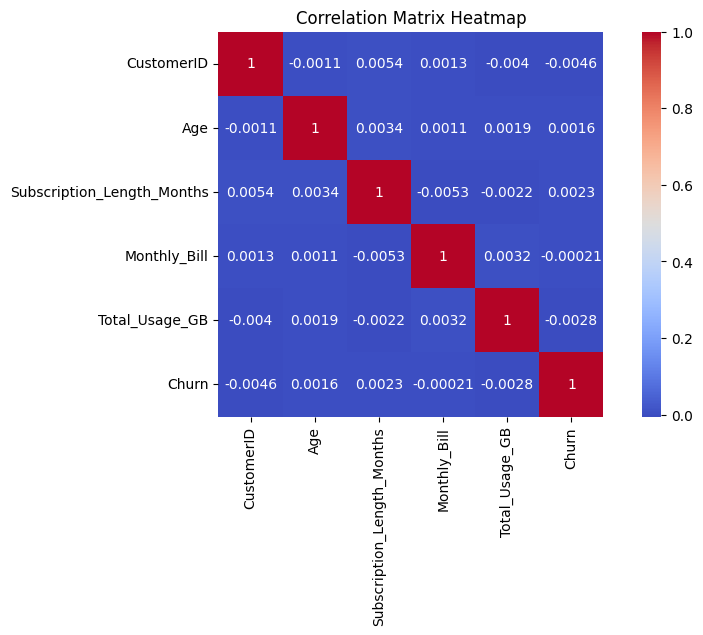

In [18]:
corr_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(10,5)) #(width,height)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [19]:
df.drop(columns=['CustomerID', 'Name'],axis=1,inplace=True)

In [20]:
df.columns

Index(['Age', 'Gender', 'Location', 'Subscription_Length_Months',
       'Monthly_Bill', 'Total_Usage_GB', 'Churn'],
      dtype='object')

In [21]:

for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in '{column}': {unique_values}")
    print()

missing_values = df.isnull().sum()
data_types = df.dtypes

print('-'*50)
print("Missing values:")
print(missing_values)
print()

x = df.duplicated().sum()
print('-'*50)
print("Duplicate values:", x)
print()


y = df.shape
print('-'*50)
print("Shape of Dataset:", y)
print()

z = df.columns
print('-'*50)
print("Columns of Datset:", z)
print()

print('-'*50)
print("\nData types:")
print(data_types)
print()

Unique values in 'Age': [63 62 24 36 46 67 30 20 53 50 44 34 28 42 55 43 31 41 58 64 70 18 25 27
 66 29 60 26 45 19 37 49 38 57 47 48 40 21 33 51 35 69 61 52 39 56 59 65
 22 54 68 32 23]

Unique values in 'Gender': ['Male' 'Female']

Unique values in 'Location': ['Los Angeles' 'New York' 'Miami' 'Chicago' 'Houston']

Unique values in 'Subscription_Length_Months': [17  1  5  3 19 15 10 12 20 13  8 23  2  4 18  9 14 16  6  7 24 22 11 21]

Unique values in 'Monthly_Bill': [73.36 48.76 85.47 ... 75.21 41.98 83.55]

Unique values in 'Total_Usage_GB': [236 172 460 297 266 456 269 396 150 383 442 295 148 239 233 231 198 354
 429 243 270 389 226 393  89 183 135 185 151 115 194 278 423 202 495 162
 101 294 122 305 212 220 253 411 447 218 221 166  64  67 391 232 298 334
 326 459 371 299 376 214 329  50 444 113  76 134 184 319 235  85 332  73
 369 308 446 321  83 114 296 102 215 169 225 140  84 463 402 468 375 366
 404 471 204 320 178 149 361 304 281 177 117 137 322 427 403 237 439 336
 344 288 2

OUTLIER TREATMENT

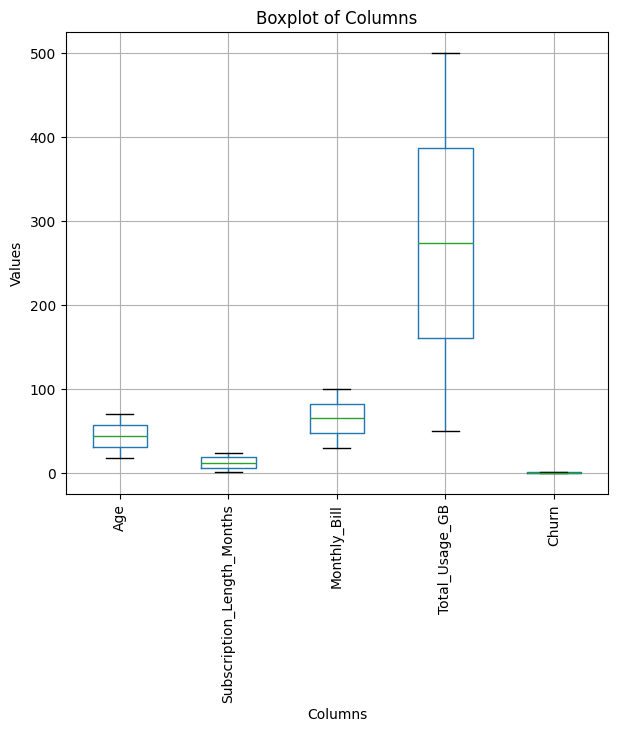

In [22]:
# Adjust figure size based on the number of columns
num_columns = len(df.columns)
fig, ax = plt.subplots(figsize=(10, 6))
if num_columns > 16:
    fig.set_size_inches(10, num_columns * 0.6)
else:
    fig.set_size_inches(num_columns, 6)

# Create a boxplot for each column
df.boxplot(ax=ax)

# Set the title and labels
plt.title("Boxplot of Columns")
plt.xlabel("Columns")
plt.ylabel("Values")

# Rotate the x-axis labels for better readability (optional)
plt.xticks(rotation=90)

# Show the plot
plt.show()

In [23]:
# Make a copy of cleaned data

df_cleaned = df.copy()

FEATURE ENCODING

In [24]:
categorical_columns = df.select_dtypes(include=['object']).columns
categorical_columns

Index(['Gender', 'Location'], dtype='object')

In [25]:
df = pd.get_dummies(df, columns=['Gender', 'Location'], drop_first = True)
df.head()

,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,Gender_Male,Location_Houston,Location_Los Angeles,Location_Miami,Location_New York
0,63,17,73.36,236,0,True,False,True,False,False
1,62,1,48.76,172,0,False,False,False,False,True
2,24,5,85.47,460,0,False,False,True,False,False
3,36,3,97.94,297,1,False,False,False,True,False
4,46,19,58.14,266,0,False,False,False,True,False


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Age                         100000 non-null  int64  
 1   Subscription_Length_Months  100000 non-null  int64  
 2   Monthly_Bill                100000 non-null  float64
 3   Total_Usage_GB              100000 non-null  int64  
 4   Churn                       100000 non-null  int64  
 5   Gender_Male                 100000 non-null  bool   
 6   Location_Houston            100000 non-null  bool   
 7   Location_Los Angeles        100000 non-null  bool   
 8   Location_Miami              100000 non-null  bool   
 9   Location_New York           100000 non-null  bool   
dtypes: bool(5), float64(1), int64(4)
memory usage: 4.3 MB


In [27]:
df.shape

(100000, 10)

In [28]:
# Select appropriate bin size using sturges_rule

import math

def sturges_rule(num_data_points):
    k = 1 + math.log2(num_data_points)
    return int(k)

# Example usage
num_data_points = 100000
bins = sturges_rule(num_data_points)
print("Number of bins according to Sturges' Rule:", bins)

Number of bins according to Sturges' Rule: 17


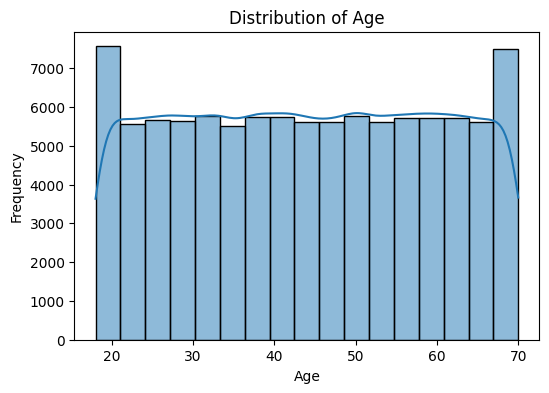

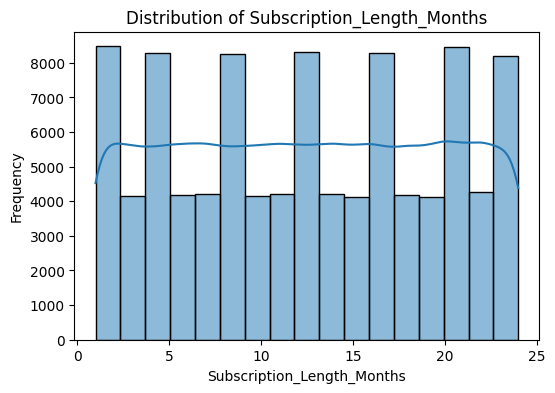

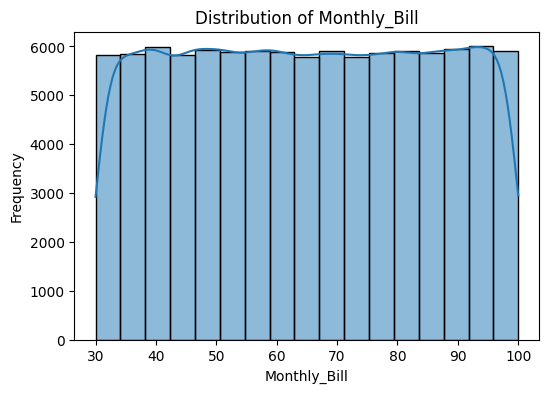

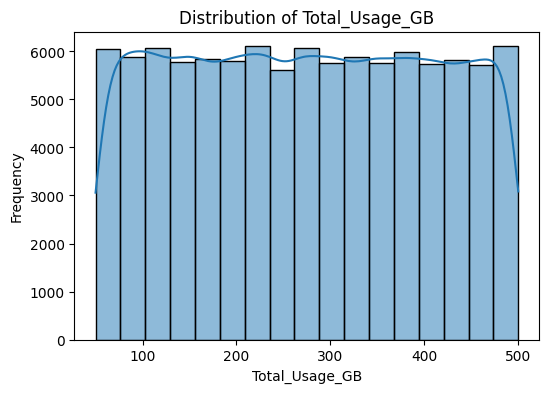

In [29]:
# check distribution of all continuous variables
continuous_vars = df.select_dtypes(include=['float64', 'int64']).columns

# Exclude binary variables from the list
binary_vars = [var for var in continuous_vars if df[var].nunique() == 2]

# Exclude binary variables from the continuous variables
continuous_vars = [var for var in continuous_vars if var not in binary_vars]

# Plot the distribution of each continuous variable
for var in continuous_vars:
    plt.figure(figsize=(6, 4))
    sns.histplot(data=df, x=var, bins=17, kde=True)
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {var}')
    plt.show()

In [30]:
# check skewness of all continuous variables
df[continuous_vars].skew()

,0
Age,-0.002689
Subscription_Length_Months,-0.001655
Monthly_Bill,-0.000326
Total_Usage_GB,0.007113


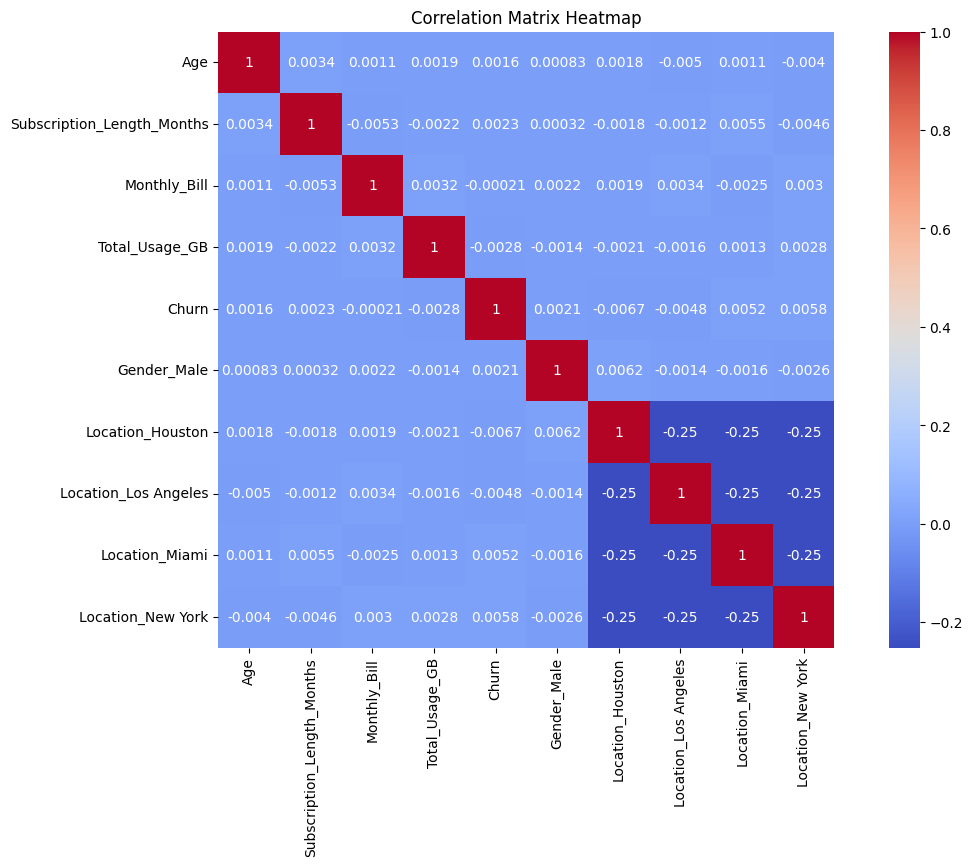

In [31]:
#checking colinearity between variables

corr_matrix = df.corr()

plt.figure(figsize=(14,8)) #(width,height)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [32]:
x = df.drop("Churn",axis=1)
y = df['Churn']

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [35]:
X_train.shape, y_train.shape


((70000, 9), (70000,))

In [36]:
X_test.shape, y_test.shape

((30000, 9), (30000,))

In [37]:
df.head()

,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,Gender_Male,Location_Houston,Location_Los Angeles,Location_Miami,Location_New York
0,63,17,73.36,236,0,True,False,True,False,False
1,62,1,48.76,172,0,False,False,False,False,True
2,24,5,85.47,460,0,False,False,True,False,False
3,36,3,97.94,297,1,False,False,False,True,False
4,46,19,58.14,266,0,False,False,False,True,False


In [38]:
columns_to_check = df.columns
columns_needs_to_be_scaled = []

for column in columns_to_check:
    if (df[column] > 1).any() or (df[column] < 0).any():
        columns_needs_to_be_scaled.append(column)

print("Columns with values greater than 1 or less than 0:")
print(columns_needs_to_be_scaled)

Columns with values greater than 1 or less than 0:
['Age', 'Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB']


In [39]:
from sklearn.preprocessing import MinMaxScaler

columns_to_scale = ['Age', 'Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB']

scaler = MinMaxScaler()

X_train[columns_to_scale] = scaler.fit_transform(X_train[columns_to_scale])

X_test[columns_to_scale] = scaler.transform(X_test[columns_to_scale])

In [40]:
X_train.head()

,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Gender_Male,Location_Houston,Location_Los Angeles,Location_Miami,Location_New York
76513,0.134615,0.521739,0.973425,0.928889,True,False,True,False,False
60406,0.692308,0.043478,0.598657,0.740000,False,True,False,False,False
27322,0.269231,0.826087,0.509358,0.837778,True,False,False,False,False
53699,0.826923,0.478261,0.760109,0.031111,False,True,False,False,False
65412,1.000000,0.173913,0.170453,0.108889,False,False,False,False,True


In [41]:
X_test.head()

,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Gender_Male,Location_Houston,Location_Los Angeles,Location_Miami,Location_New York
75721,0.576923,0.434783,0.835548,0.982222,False,True,False,False,False
80184,0.596154,0.521739,0.151593,0.828889,True,False,False,False,True
19864,0.250000,0.173913,0.043006,0.502222,False,False,True,False,False
76699,0.673077,0.130435,0.923846,0.642222,True,False,False,False,True
92991,0.096154,1.000000,0.745964,0.564444,False,False,True,False,False


In [42]:
class_counts = df['Churn'].value_counts()
class_counts

,count
Churn,
0,50221
1,49779


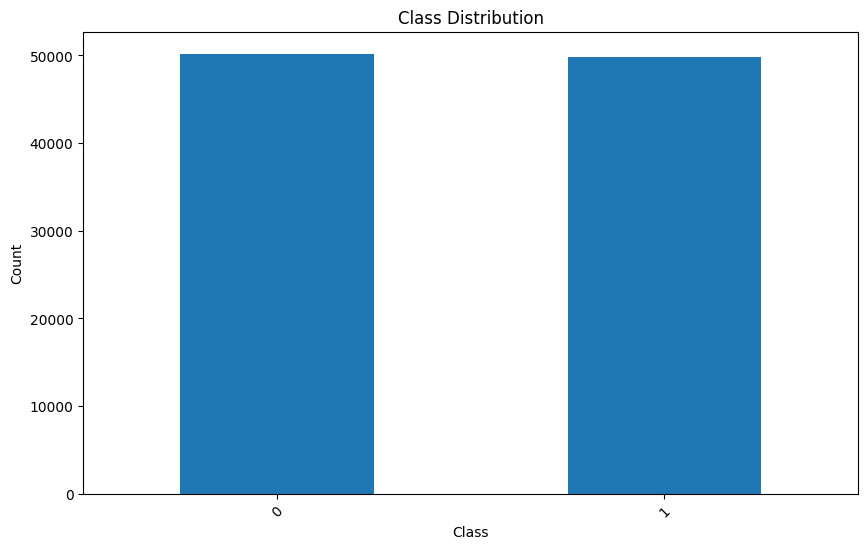

In [43]:
plt.figure(figsize=(10, 6))
class_counts.plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

Feature Selection using Random Forest Feature Importance Method

In [45]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(n_jobs=-1, random_state=42)

rf_classifier.fit(X_train, y_train)

importances = rf_classifier.feature_importances_

feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False).reset_index(drop=True)

feature_importance_df

,Feature,Importance
0,Monthly_Bill,0.316383
1,Total_Usage_GB,0.290353
2,Age,0.194396
3,Subscription_Length_Months,0.142624
4,Gender_Male,0.016683
5,Location_Los Angeles,0.010595
6,Location_Houston,0.010007
7,Location_Miami,0.009792
8,Location_New York,0.009166


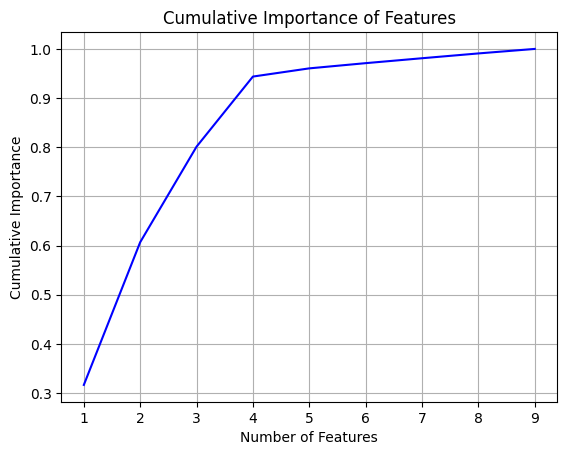

In [46]:
#check optimal number of features

sorted_indices = np.argsort(importances)[::-1]
cumulative_importance = np.cumsum(importances[sorted_indices])

plt.plot(range(1, len(importances) + 1), cumulative_importance, 'b-')
plt.xlabel('Number of Features')
plt.ylabel('Cumulative Importance')
plt.title('Cumulative Importance of Features')
plt.grid(True)
plt.show()

Model Building

In [53]:
pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.7 MB/s eta 0:00:00


In [61]:
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

algorithms = [
    CatBoostClassifier(iterations=1000, depth=8, learning_rate=0.03, l2_leaf_reg=5, random_strength=1,
                   loss_function='Logloss', verbose=200, random_state=42),
    XGBClassifier(n_estimators=1100, max_depth=7, learning_rate=0.02, subsample=0.8, colsample_bytree=0.8,
              reg_alpha=0.1, reg_lambda=1.0, n_jobs=-1, random_state=42),
    LGBMClassifier(n_estimators=1100, max_depth=9, learning_rate=0.025, subsample=0.8, colsample_bytree=0.8,
               min_child_samples=20, reg_alpha=0.1, reg_lambda=1.0, n_jobs=-1, random_state=42),
    StackingClassifier(
    estimators=[
        ('xgb', XGBClassifier(n_estimators=600, max_depth=7, random_state=42)),
        ('rf', RandomForestClassifier(n_estimators=600, max_depth=10, random_state=42)),
        ('lgbm', LGBMClassifier(n_estimators=600, max_depth=8, random_state=42))
    ],
    final_estimator=XGBClassifier(n_estimators=300, max_depth=5, learning_rate=0.03, random_state=42),
    n_jobs=-1
)
]


# Initialize the results dictionary for training data
results_train = {
    'Algorithm': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1-score': [],
    'Building Time (s)': []
}

# Apply the algorithms and calculate performance metrics for training data
for algorithm in algorithms:
    start_time = time.time()  # Start timer

    algorithm_name = type(algorithm).__name__
    algorithm.fit(X_train, y_train)
    y_train_pred = algorithm.predict(X_train)

    accuracy = accuracy_score(y_train, y_train_pred)
    precision = precision_score(y_train, y_train_pred, average='weighted')
    recall = recall_score(y_train, y_train_pred, average='weighted')
    f1 = f1_score(y_train, y_train_pred, average='weighted')

    end_time = time.time()  # End timer
    building_time = end_time - start_time

    results_train['Algorithm'].append(algorithm_name)
    results_train['Accuracy'].append(accuracy)
    results_train['Precision'].append(precision)
    results_train['Recall'].append(recall)
    results_train['F1-score'].append(f1)
    results_train['Building Time (s)'].append(building_time)

# Create a dataframe for the training data results
df_train = pd.DataFrame(results_train)
df_train

0:	learn: 0.6930892	total: 66.4ms	remaining: 1m 6s
200:	learn: 0.6836713	total: 4.64s	remaining: 18.4s
400:	learn: 0.6759448	total: 10.2s	remaining: 15.2s
600:	learn: 0.6679247	total: 14.2s	remaining: 9.41s
800:	learn: 0.6603341	total: 18.2s	remaining: 4.52s
999:	learn: 0.6532876	total: 23.8s	remaining: 0us
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 34931, number of negative: 35069
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004890 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 592
[LightGBM] [Info] Number of data points in the train set: 70000, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499014 -> initscore=-0.003943
[LightGBM] [Info] Start training from score -0.003943


,Algorithm,Accuracy,Precision,Recall,F1-score,Building Time (s)
0,CatBoostClassifier,0.666286,0.666512,0.666286,0.666147,24.236761
1,XGBClassifier,0.747786,0.747895,0.747786,0.747750,11.276915
2,LGBMClassifier,0.681457,0.681887,0.681457,0.681239,8.831490
3,StackingClassifier,0.500143,0.500042,0.500143,0.498769,243.983272


In [67]:
results_test = {
    'Algorithm': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1-score': []
}

conf_matrices = {}

# Apply the algorithms and calculate performance metrics for test data
for algorithm in algorithms:
    algorithm_name = type(algorithm).__name__
    y_test_pred = algorithm.predict(X_test)

    accuracy = accuracy_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred, average='weighted')
    recall = recall_score(y_test, y_test_pred, average='weighted')
    f1 = f1_score(y_test, y_test_pred, average='weighted')

    results_test['Algorithm'].append(algorithm_name)
    results_test['Accuracy'].append(accuracy)
    results_test['Precision'].append(precision)
    results_test['Recall'].append(recall)
    results_test['F1-score'].append(f1)

    conf_matrices[algorithm_name] = confusion_matrix(y_test, y_test_pred)
# Create a dataframe for the test data results
df_test = pd.DataFrame(results_test)
df_test

,Algorithm,Accuracy,Precision,Recall,F1-score
0,CatBoostClassifier,0.501767,0.501585,0.501767,0.501510
1,XGBClassifier,0.498033,0.497892,0.498033,0.497868
2,LGBMClassifier,0.500100,0.499884,0.500100,0.499767
3,StackingClassifier,0.503933,0.503474,0.503933,0.502498


<ipython-input-68-03cee5a30b49>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Algorithm', y=metric, data=df_test, palette='viridis')
<ipython-input-68-03cee5a30b49>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Algorithm', y=metric, data=df_test, palette='viridis')
<ipython-input-68-03cee5a30b49>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Algorithm', y=metric, data=df_test, palette='viridis')
<ipython-input-68-03cee5a30b49>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in

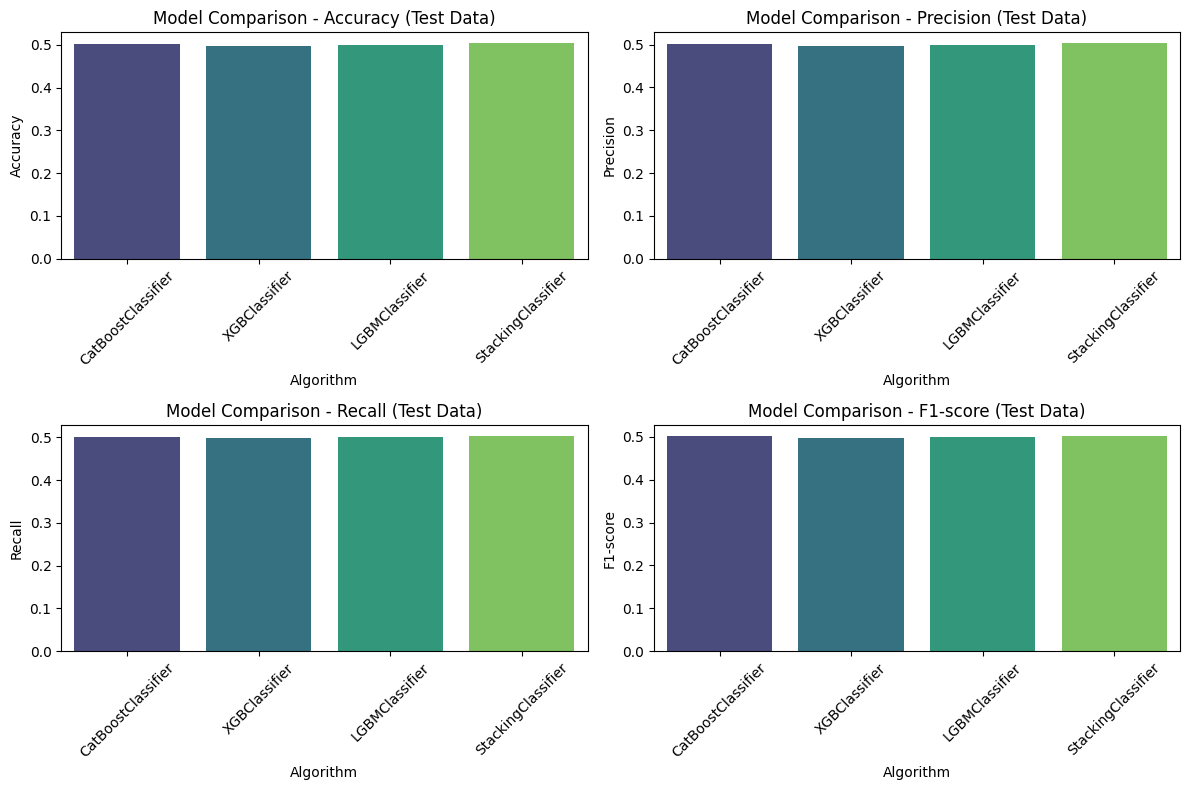

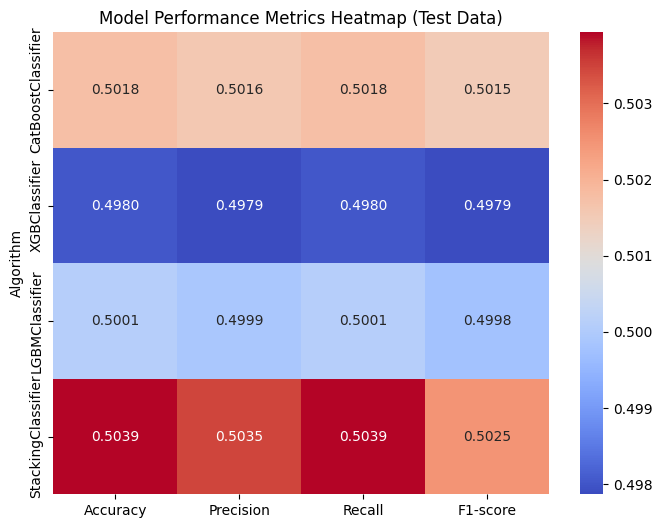

In [68]:
# Plot bar charts for comparison
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
plt.figure(figsize=(12, 8))
for i, metric in enumerate(metrics):
    plt.subplot(2, 2, i+1)
    sns.barplot(x='Algorithm', y=metric, data=df_test, palette='viridis')
    plt.xticks(rotation=45)
    plt.title(f'Model Comparison - {metric} (Test Data)')
    plt.ylabel(metric)
plt.tight_layout()
plt.show()

# Plot heatmap for test results
plt.figure(figsize=(8, 6))
sns.heatmap(df_test.set_index('Algorithm'), annot=True, cmap='coolwarm', fmt='.4f')
plt.title('Model Performance Metrics Heatmap (Test Data)')
plt.show()


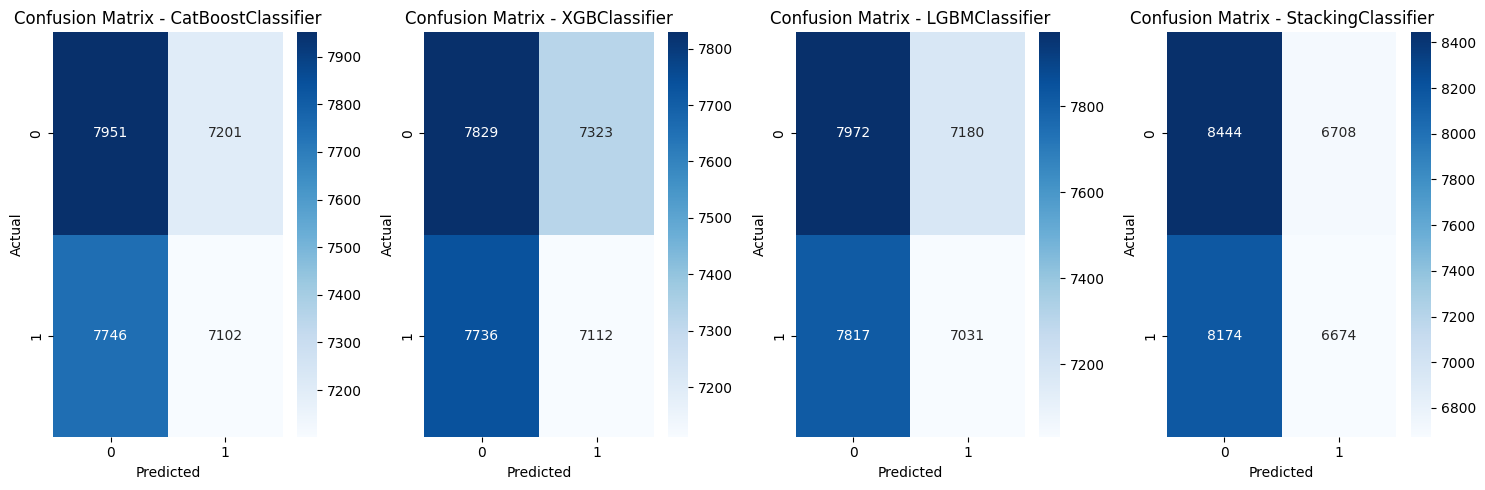

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Plot confusion matrices
fig, axes = plt.subplots(nrows=1, ncols=len(conf_matrices), figsize=(15, 5))
if len(conf_matrices) == 1:
    axes = [axes]

for ax, (name, cm) in zip(axes, conf_matrices.items()):
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
    ax.set_title(f'Confusion Matrix - {name}')
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')

plt.tight_layout()
plt.show()
